In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from desisim.templates import ELG, LRG

In [32]:
elg = ELG()
lrg = LRG(normfilter='decam2014-r')

INFO:io.py:612:read_basis_templates: Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/elg_templates_v2.0.fits


INFO:DESI:Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/elg_templates_v2.0.fits


INFO:io.py:612:read_basis_templates: Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/lrg_templates_v1.3.fits


INFO:DESI:Reading /Users/ioannis/research/projects/desi/spectro/templates/basis_templates/v2.2/lrg_templates_v1.3.fits


In [53]:
eflux, wave, emeta = elg.make_templates(nmodel=1, nocolorcuts=True, seed=123, mag=[23.0])

In [44]:
lflux, _, lmeta = lrg.make_templates(nmodel=1, nocolorcuts=True, seed=123, mag=[21.8])

In [62]:
lmeta

OBJTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
LRG,124,2991312382,0.502067,21.8,0.0526277 .. 7.14666,14.1627 .. 9.11354,-1.0,-1.0,-1.0,-1.0,2.0982,176.746,-1.0,-1.0,-1.0,-1.0,-1.0,0.03,5.01187,-1.0,-1.0,-1.0


In [63]:
emeta

OBJTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ELG,7345,2991312382,1.18034,23.0,0.388789 .. 1.44419,2.12205 .. 1.77418,3.00614e-16,-1.0,257.108,-1.0,1.0338,59.43,0.697248,0.154731,0.494617,-0.27648,0.0910287,-1.0,-1.0,-1.0,-1.0,-1.0


(0, 2e-17)

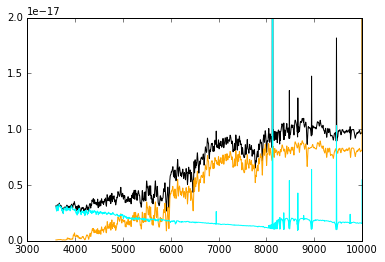

In [59]:
plt.plot(wave, eflux[0, :] + lflux[0, :], color='k')
plt.plot(wave, lflux[0, :], color='orange')
plt.plot(wave, eflux[0, :], color='cyan')
plt.ylim(0, 2E-17)

In [16]:
3727*(2.45)

9131.150000000001